Eva.ru forum posts periodicity is analyzed in this notebook.

After the posts were downloaded from the forum, time and date related attributes were precalculated in TimeTrends FeatureEngineering.ipynb

Number of posts downloaded is limited to 300 per forum topic. The limit is set on the side of eva.ru web-engine. So the total numbers of posts are not exact but only shows the difference between dates.

## Libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import a package to manage the warnings and ignore them
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [ ]:
Data='/content/drive/MyDrive/Colab Notebooks/Projects/eva/Data/'

ta_extension_filename='TextAttributes_ext.csv'
ta_extension_full_filename=os.path.join(Data, ta_extension_filename)

ts_extension_filename='TimeTrends_ext.csv'
ts_extension_full_filename=os.path.join(Data, ts_extension_filename)

sa_extension_filename='SentimentAnalysis_ext.csv'
sa_extension_full_filename=os.path.join(Data, sa_extension_filename)

authors_filename='Authors.csv'
authors_full_filename=os.path.join(Data, authors_filename)

In [ ]:
ts_ext = pd.read_csv(ts_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
ts_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'cnt_childs', 'cnt_immediate_childs', 'Date', 'year', 'month',
       'day_of_week', 'hour', 'day_part', 'is_weekend', 'is_ruNationalHoliday',
       'is_ruObservance', 'is_ruOtherNotWorkingDay', 'HolidayName',
       'HolidayType', 'day_type'],
      dtype='object')

In [ ]:
ts_ext['Timestamp']=pd.to_datetime(ts_ext['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
sa_ext = pd.read_csv(sa_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
sa_ext.columns

In [ ]:
ts_ext = pd.merge(ts_ext, sa_ext[['Message_Id','tatyana']], left_on='Message_Id', right_on='Message_Id', how='inner')

## Total Posts by year and month

In [ ]:
df=ts_ext[((ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year', 'month']].groupby(['month','year']).size().reset_index(name='Total Posts')
df['month'] = ['0' + str(x) if x<=9 else str(x) for x in df['month']]
df['yyyyymm']=df['year'].astype(str)+df['month'].astype(str)
df=df.sort_values('yyyyymm',ascending=True)
n = 3

ax = df.plot.bar(x='yyyyymm',y='Total Posts',  figsize=(15,8))
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.figure.show()
plt.title('Total Posts by year and months', fontdict={'fontsize':18},    pad=14);

In [ ]:
df=ts_ext[((ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year', 'month']].groupby(['month','year']).size().reset_index(name='Total Posts')
df['Total Posts'] = df['Total Posts']/1000
df['Total Posts'] = df['Total Posts'].fillna(0)
df['Total Posts'] = df['Total Posts'].astype(int)
df = df.pivot('month','year','Total Posts')
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df, cmap='RdYlGn_r', robust=True,  fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11},  
                 cbar_kws={'shrink':.8, 'label':'Total Posts in thousands'})                                 
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Total Posts in thousands by year and months', fontdict={'fontsize':18},    pad=14);

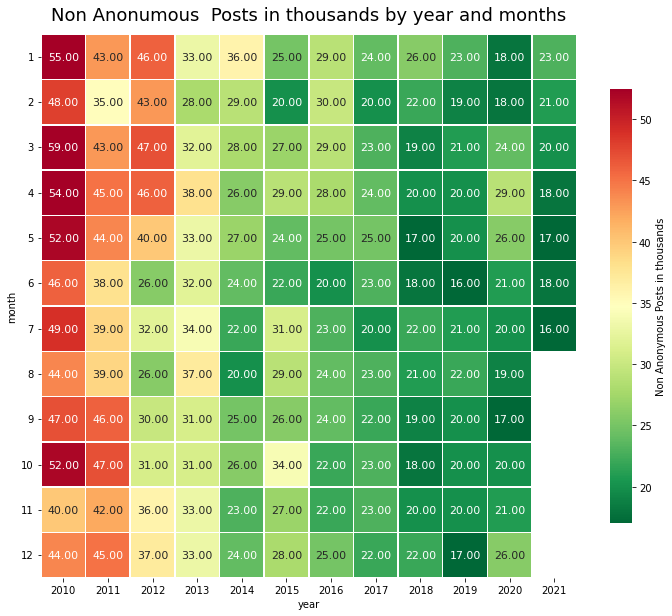

In [ ]:
df=ts_ext[((ts_ext['Author_Id']>0) & (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year', 'month']].groupby(['month','year']).size().reset_index(name='Total Posts')
df['Total Posts'] = df['Total Posts']/1000
df['Total Posts'] = df['Total Posts'].fillna(0)
df['Total Posts'] = df['Total Posts'].astype(int)
df = df.pivot('month','year','Total Posts')
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df, cmap='RdYlGn_r', robust=True,  fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11},  
                 cbar_kws={'shrink':.8, 'label':'Non Anonymous Posts in thousands'})                                 
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Non Anonumous  Posts in thousands by year and months', fontdict={'fontsize':18},    pad=14);

The best days of the forum were before 2012 when more posts were published monthly comparing to nowdays. Users posted their messages using their names mostly, not anonymously.

The next spike is 2020 Mar-May COVID-19 lockdown.

Seasonality is clear seen in the data when less posts are published in summer time.

## How sentiments are changed over time?

In [ ]:
sentiments = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
mpl_colors = ['red','gray','green']
colors = dict(zip(sentiments, mpl_colors))

Text(0.5, 1.0, 'Percent of Neg/Neu/Pos posts per year')

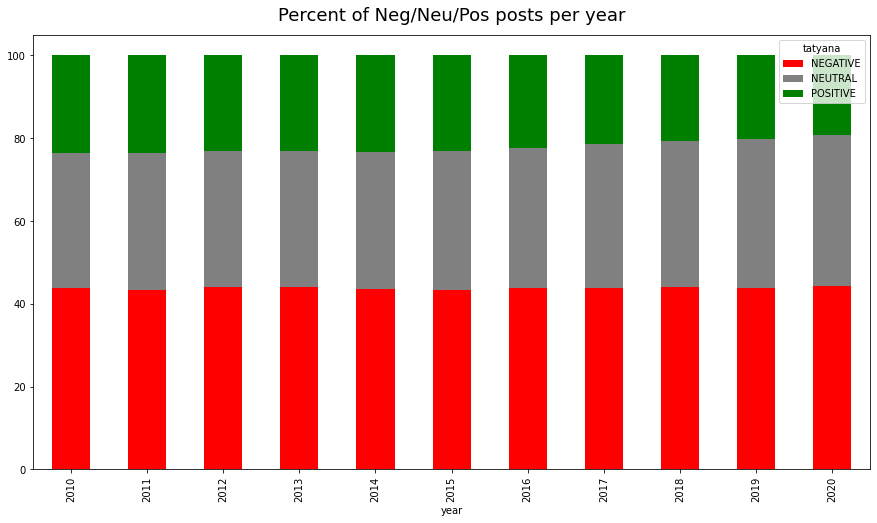

In [ ]:
df = ts_ext[( (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-01-01'))].groupby(['year','tatyana']).size().unstack('tatyana').fillna(0)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data[['NEGATIVE','NEUTRAL','POSITIVE']].plot(kind='bar', stacked=True, color=colors, figsize=(15,8))
plt.title('Percent of Neg/Neu/Pos posts per year', fontdict={'fontsize':18},    pad=14)

Text(0.5, 1.0, 'Percent of Neg/Neu/Pos posts per month')

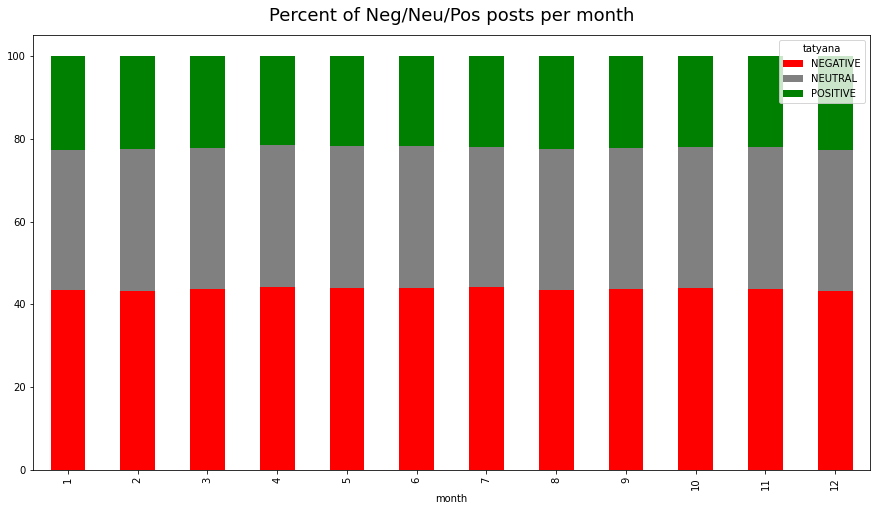

In [ ]:
df = ts_ext[( (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-01-01'))].groupby(['month','tatyana']).size().unstack('tatyana').fillna(0)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data[['NEGATIVE','NEUTRAL','POSITIVE']].plot(kind='bar', stacked=True, color=colors, figsize=(15,8))
plt.title('Percent of Neg/Neu/Pos posts per month', fontdict={'fontsize':18},    pad=14)

Text(0.5, 1.0, 'Percent of Neg/Neu/Pos posts per day of week')

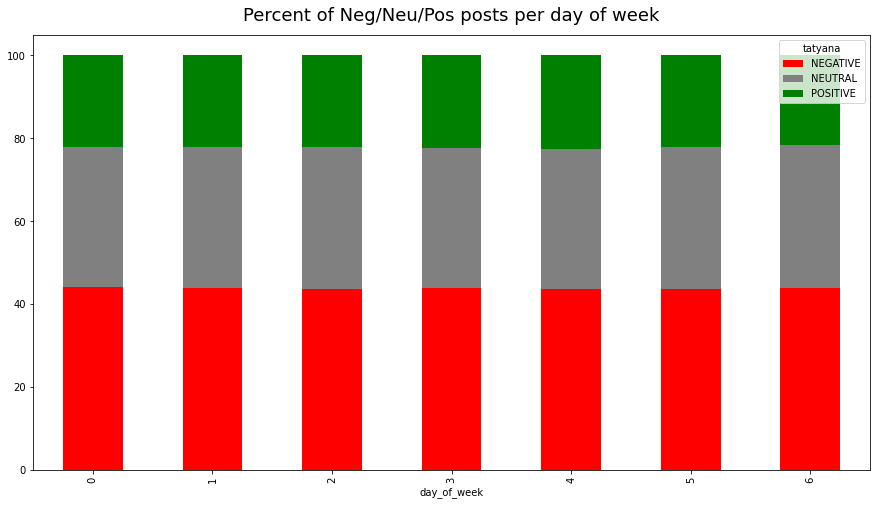

In [ ]:
df = ts_ext[( (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-01-01'))].groupby(['day_of_week','tatyana']).size().unstack('tatyana').fillna(0)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data[['NEGATIVE','NEUTRAL','POSITIVE']].plot(kind='bar', stacked=True, color=colors, figsize=(15,8))
plt.title('Percent of Neg/Neu/Pos posts per day of week', fontdict={'fontsize':18},    pad=14)

Text(0.5, 1.0, 'Percent of Neg/Neu/Pos posts per part of day')

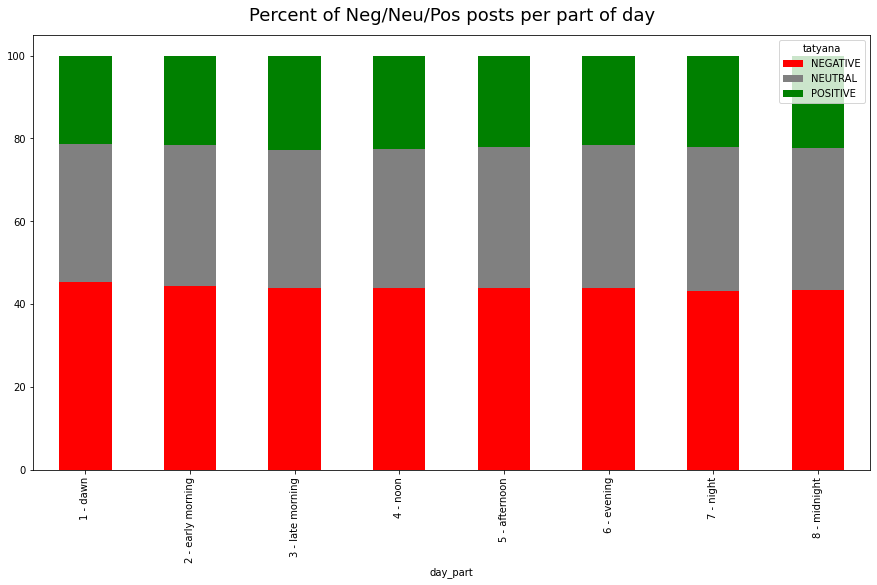

In [ ]:
df = ts_ext[( (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-01-01'))].groupby(['day_part','tatyana']).size().unstack('tatyana').fillna(0)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data[['NEGATIVE','NEUTRAL','POSITIVE']].plot(kind='bar', stacked=True, color=colors, figsize=(15,8))
plt.title('Percent of Neg/Neu/Pos posts per part of day', fontdict={'fontsize':18},    pad=14)

No changes in sentiment over time of day, season or historically.

## Posts by month

Text(0.5, 1.0, 'Number of posts per months excluding lockdown 2020')

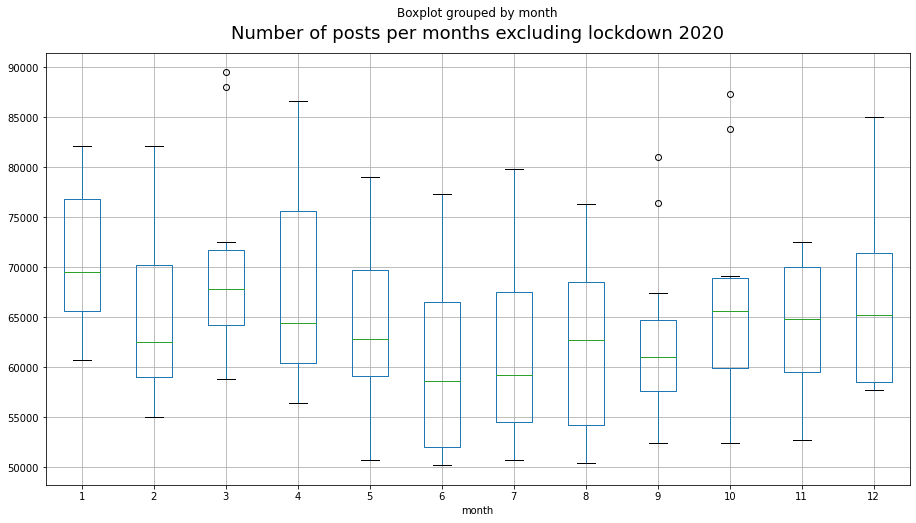

In [ ]:
df=ts_ext[(~((ts_ext['year']==2020) & (ts_ext['month'].isin([3,4,5]))) & (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year', 'month']].groupby(['month','year']).size().reset_index(name='Total Posts')
df[['month','Total Posts']].boxplot(column='Total Posts', by='month', figsize=(15,8))
plt.title('Number of posts per months excluding lockdown 2020', fontdict={'fontsize':18},    pad=14)

There are less posts in Jun-Jul when summer breaks start and more starting Aug when women back from vacation sharing their expirience.

## Number of posts per week day

Text(0.5, 1.0, 'Number of posts per day of week excluding lockdown 2020')

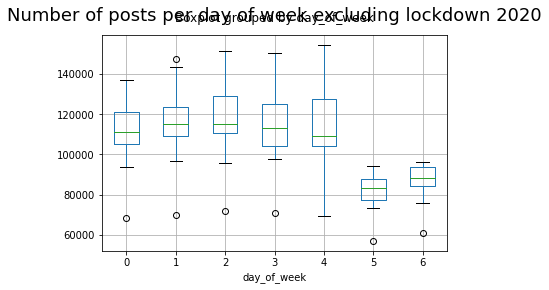

In [ ]:
df=ts_ext[(~((ts_ext['year']==2020) & (ts_ext['month'].isin([3,4,5]))) & (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year','day_of_week']].groupby(['day_of_week','year']).size().reset_index(name='Total Posts')
df[['day_of_week','Total Posts']].boxplot(column='Total Posts', by='day_of_week')
plt.title('Number of posts per day of week excluding lockdown 2020', fontdict={'fontsize':18},    pad=14)

Less posts on weekends, even on Friday.

## Number of posts per time of day

In [ ]:
#def ChangeValue(row):
#    if row['day_part']=='dawn':
#      return '1 - dawn'
#    elif row['day_part']=='early morning':
#      return '2 - early morning'
#    elif row['day_part']=='late morning':
#      return '3 - late morning'
#    elif row['day_part']=='noon':
#      return '4 - noon'
#    elif row['day_part']=='afternoon':
#      return '5 - afternoon'
#    elif row['day_part']=='evening':
#      return '6 - evening'
#    elif row['day_part']=='midnight':
#      return '8 - midnight'
#    elif row['day_part']=='night':
#      return '7 - night'                              

In [ ]:
#ts_ext['day_part'] = ts_ext.apply(ChangeValue, axis=1)

Text(0.5, 1.0, 'Number of posts per time of day excluding lockdown 2020')

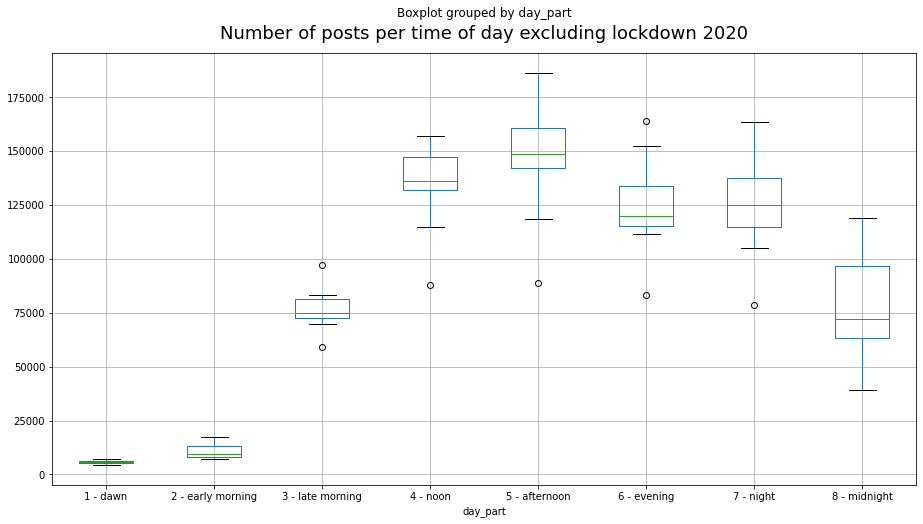

In [ ]:
df=ts_ext[(~((ts_ext['year']==2020) & (ts_ext['month'].isin([3,4,5]))) & (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year','day_part']].groupby(['day_part','year']).size().reset_index(name='Total Posts')
df[['day_part','Total Posts']].boxplot(column='Total Posts', by='day_part',figsize=(15,8))
plt.title('Number of posts per time of day excluding lockdown 2020', fontdict={'fontsize':18},    pad=14)

In [ ]:
#ts_ext.to_csv(ts_extension_full_filename, header=True, index=False)

Most posts are published day time from offices or when kids are in school. Early morning and night messages are from users in US and Canada or somebody who do not sleep.

## Number of posts per day type (Business Day, WeekEnd, Holiday, etc)

In [ ]:
#def SetDayType(row):
#  if row['is_ruNationalHoliday']==1:
#    return '4 - NationalHoliday'
#  elif row['is_ruObservance']==1:
#    return '5 - Observance'
#  elif row['is_ruOtherNotWorkingDay']==1:
#    return '6 - OtherNotWorkingDay'
#  elif row['is_weekend']==1:
#    return '2 - Saturday'
#  elif row['is_weekend']==2:
#    return '3 - Sunday'
#  else:
#    return '1 - BusinessDay'

In [ ]:
#ts_ext['day_type'] = ts_ext.apply(SetDayType, axis=1)

In [ ]:
#ts_ext.to_csv(ts_extension_full_filename, header=True, index=False)

Text(0.5, 1.0, 'Number of posts per day type')

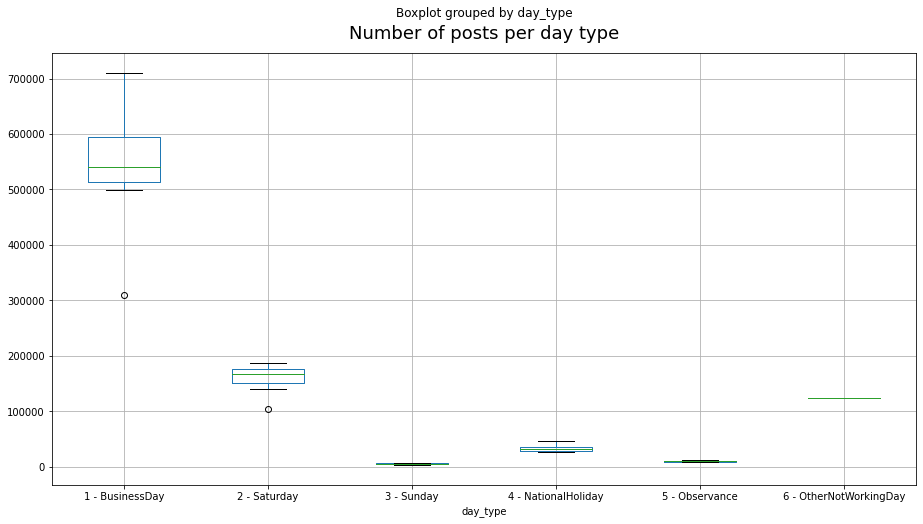

In [ ]:
df=ts_ext[((ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year','day_type']].groupby(['day_type','year']).size().reset_index(name='Total Posts')
df[['day_type','Total Posts']].boxplot(column='Total Posts', by='day_type',figsize=(15,8))
plt.title('Number of posts per day type', fontdict={'fontsize':18},    pad=14)

In [ ]:
df=ts_ext[(~((ts_ext['year']==2020) & (ts_ext['month'].isin([3,4,5]))) & (ts_ext['year']>2009) & (ts_ext['Timestamp']<'2021-07-31'))][['year','day_type']].groupby(['day_type','year']).size().reset_index(name='Total Posts')
df[['day_type','Total Posts']].boxplot(column='Total Posts', by='day_type',figsize=(15,8))
plt.title('Number of posts per day type excluding lockdown 2020', fontdict={'fontsize':18},    pad=14)

More posts during business days and on Saturday, Sunday and Holidays women spend more time with their families. Other Not Working Day is 2020 Mar-May COVID-19 lockdown.

## Users registration

In [ ]:
Authors = pd.read_csv(authors_full_filename, error_bad_lines=False, index_col=False)

In [ ]:
Authors['year'] = pd.DatetimeIndex(Authors['first_message_ts']).year
Authors['month'] = pd.DatetimeIndex(Authors['first_message_ts']).month

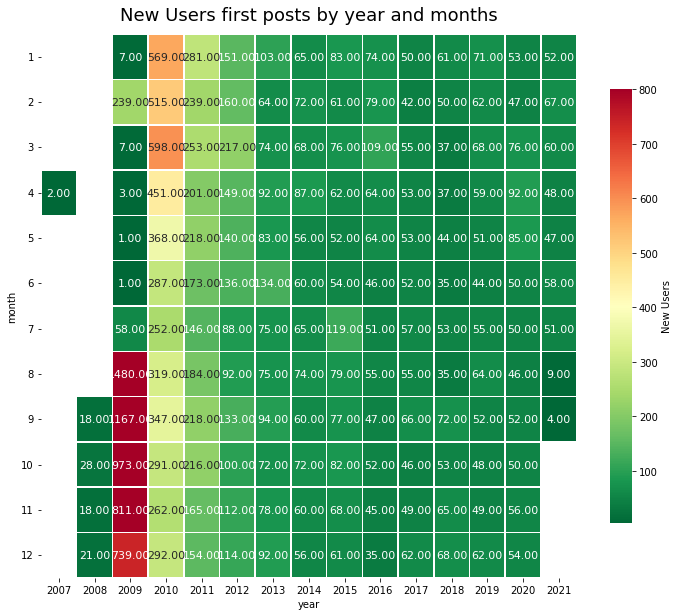

In [ ]:
df=Authors[['year', 'month']].groupby(['month','year']).size().reset_index(name='New Users')
df = df.pivot('month','year','New Users')
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df, cmap='RdYlGn_r', robust=True,  fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11},  
                 cbar_kws={'shrink':.8, 'label':'New Users'})                                 
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('New Users first posts by year and months', fontdict={'fontsize':18},    pad=14);

Most users registered before 2012. Since that year less and less users are registered monthly (and they publish posts anonymously mostly).

## Users daily activity

In [ ]:
def UsersDailyPeriodicity(row):
  if row['DayPartPeriodicity'] in ([111,110,101]):
    return '2 - Day User'
  elif row['DayPartPeriodicity'] in ([100]):
    return '1 - Morning User'
  elif row['DayPartPeriodicity'] in ([11,10]):
    return '3 - Evening User'    
  elif row['DayPartPeriodicity'] in ([1011,1110,1101,1,1001,1100]):
    return '4 - Night User'    

In [ ]:
Authors['DayPartPeriodicityCode'] = Authors.apply(UsersDailyPeriodicity, axis=1)

Text(0.5, 1.0, 'Type of users (only core users with more the 100 non-anonymous medium size posts)')

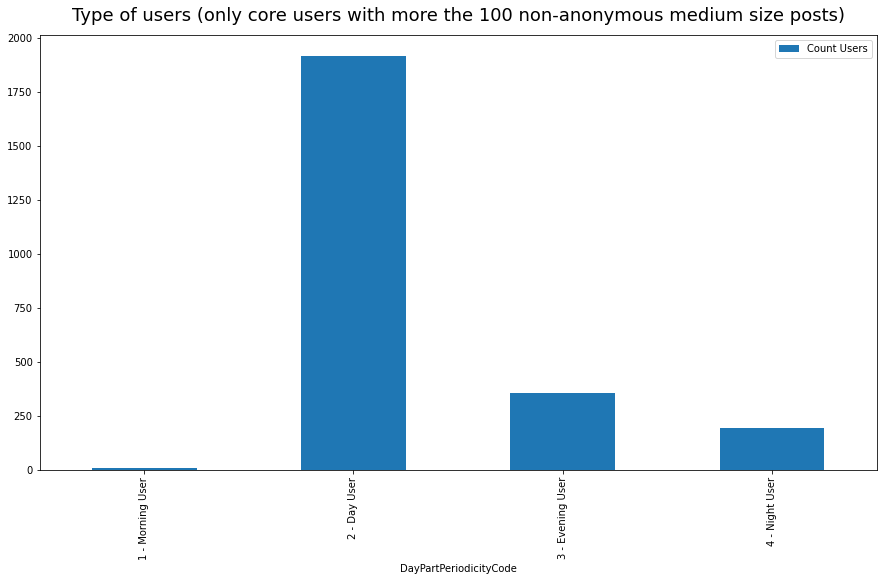

In [ ]:
df=pd.DataFrame({'cnt_authors' : Authors[Authors['cnt_medium_messages']>100].groupby(['DayPartPeriodicityCode']).size()}).reset_index()
df.columns=['DayPartPeriodicityCode','Count Users']
df.plot.bar(x='DayPartPeriodicityCode', y='Count Users', figsize=(15,8))
plt.title('Type of users (only core users with more the 100 non-anonymous medium size posts)', fontdict={'fontsize':18},    pad=14)

Day and evening users are users located in Russia and Europe. Morning and Night users are users from US West Coast, Canada